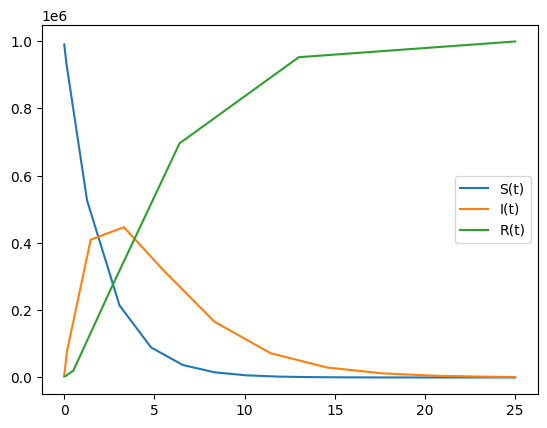

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

a = 0.5
b = 0.3
n = 1000000
s0 = 990000
i0 = 7000
r0 = 3000
t0, tf = 0, 25

def dsdt(t, s):
    return -a * s

def didt(t, i):
    return a * soln_s.sol(t) - b * i

def drdt(t, r):
    return b * soln_i.sol(t)

soln_s = solve_ivp(dsdt, (t0, tf), [s0], dense_output=True)
t1, s = soln_s.t, soln_s.y[0]
plt.plot(t1, s, label='S(t)')

soln_i = solve_ivp(didt, (t0, tf), [i0], dense_output=True)
t2, i = soln_i.t, soln_i.y[0]
plt.plot(t2, i, label='I(t)', )

soln_r = solve_ivp(drdt, (t0, tf), [r0], dense_output=True)
t3, r = soln_r.t, soln_r.y[0]
plt.plot(t3, r, label='R(t)', )

plt.legend()
plt.show()


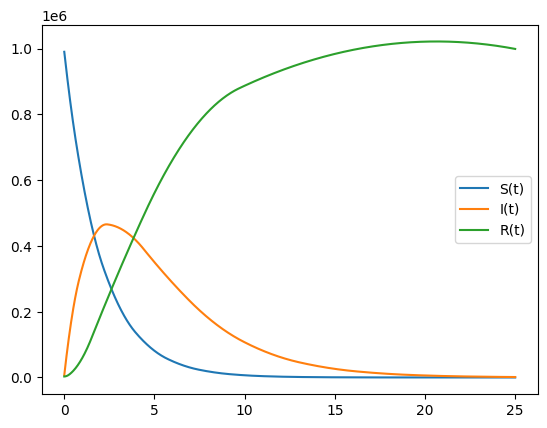

In [4]:
t4 = np.linspace(0, 25, 1000)
s_t = interp1d(t1, s, kind='quadratic')
i_t = interp1d(t2, i, kind='quadratic')
r_t = interp1d(t3, r, kind='quadratic')
plt.plot(t4, s_t(t4), label='S(t)')
plt.plot(t4, i_t(t4), label='I(t)')
plt.plot(t4, r_t(t4), label='R(t)')
plt.legend()
plt.show()